In [1]:
%config Completer.use_jedi = False

In [2]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import Basic Libraries
import os
import math
import scipy
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

# From MatplotLib
import matplotlib.pyplot as plt

# From Sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


import warnings 
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/Users/williamng/Library/CloudStorage/OneDrive-UNIVERSITYUTARAMALAYSIA/UUM SEM 4 Y2/SKIH2103 - DATA ANALYTICS/Assignment3/bmi.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [6]:
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [7]:
df.shape

(500, 4)

In [8]:
df.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [9]:
labels = ['Extremely Weak','Weak','Normal','Overweight','Obsesity','Extreme Obesity']

MAP={}
for e, i in enumerate(sorted(df["Index"].unique())):
    MAP[i]=labels[e]
    
df["Class"] = df["Index"].map(MAP)

display(df.head())


,Gender,Height,Weight,Index,Class
0,Male,174,96,4,Obsesity
1,Male,189,87,2,Normal
2,Female,185,110,4,Obsesity
3,Female,195,104,3,Overweight
4,Male,149,61,3,Overweight


In [10]:
# Checking number of unique rows in each feature

df.nunique().sort_values()

Gender      2
Index       6
Class       6
Height     60
Weight    110
dtype: int64

In [11]:
df.head()

,Gender,Height,Weight,Index,Class
0,Male,174,96,4,Obsesity
1,Male,189,87,2,Normal
2,Female,185,110,4,Obsesity
3,Female,195,104,3,Overweight
4,Male,149,61,3,Overweight


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
 4   Class   500 non-null    object
dtypes: int64(3), object(2)
memory usage: 19.7+ KB


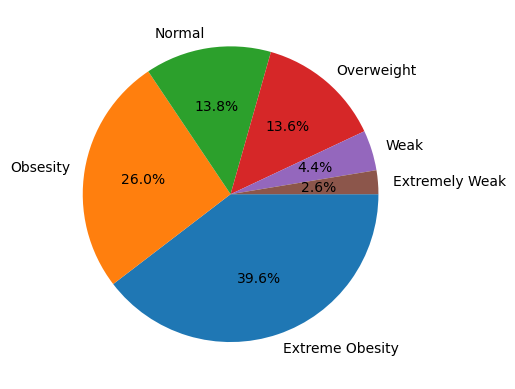

In [13]:
## EDA Exploratory Data Analysis 
#Let us first analyze the distribution of the target variable

plt.pie(df["Index"].value_counts(), labels=df["Class"].value_counts().index, counterclock=False, autopct='%1.1f%%', radius=1)
plt.show()

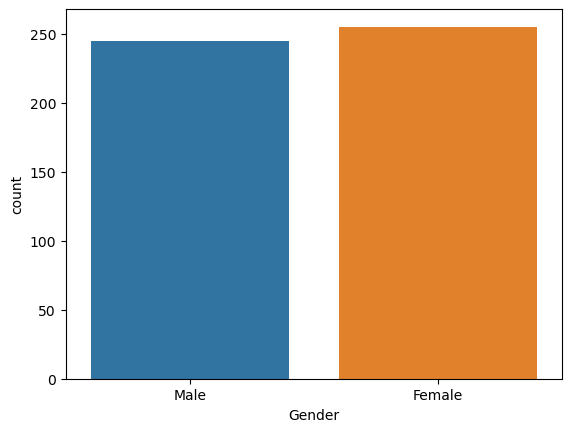

In [14]:
ax = sns.countplot(x = 'Gender', data = df)

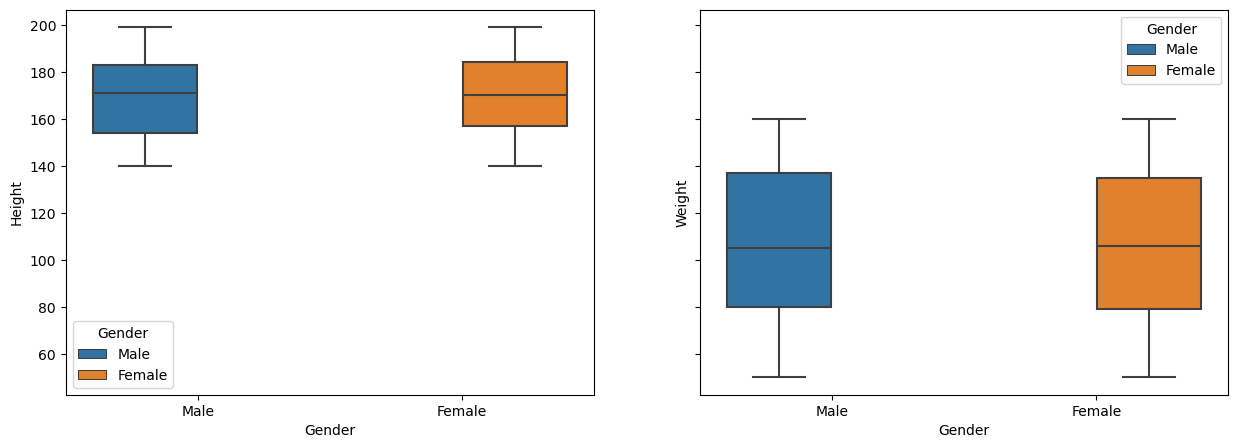

In [15]:

# Visualizing with Box Plot 

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

sns.boxplot(ax=axes[0], data = df, hue="Gender", x = "Gender", y = "Height")

sns.boxplot(ax=axes[1], data = df, hue="Gender", x = "Gender", y = "Weight")

plt.show()

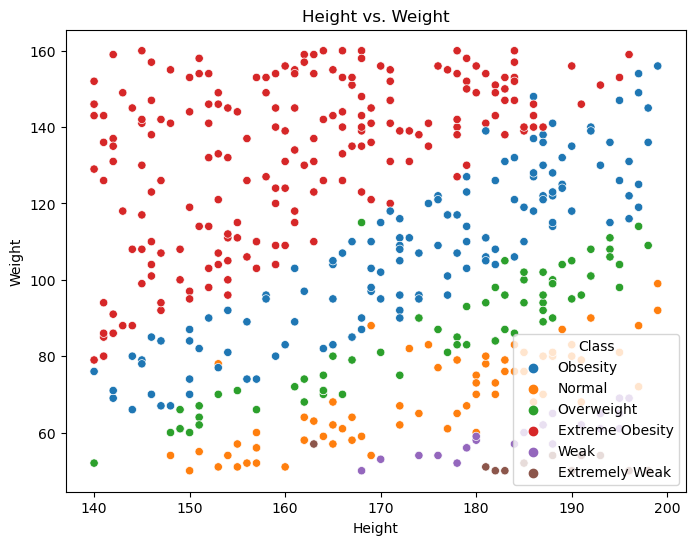

In [16]:
# Plot a scatter plot of Height vs. Weight
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Height', y='Weight', hue='Class')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs. Weight')
plt.show()

In [17]:
# Assuming your DataFrame is named 'df'
duplicates = df[df.duplicated()]

# Display the duplicate rows
print(duplicates)

#drop the duplicate data
df.drop_duplicates(inplace=True)

     Gender  Height  Weight  Index            Class
187  Female     182      84      3       Overweight
310    Male     171     147      5  Extreme Obesity
327  Female     167      85      4         Obsesity
355    Male     174      90      3       Overweight
365    Male     141      80      5  Extreme Obesity
381    Male     191      62      1             Weak
382    Male     177     117      4         Obsesity
395  Female     164      71      3       Overweight
400  Female     195     104      3       Overweight
462    Male     179      56      1             Weak
482  Female     142      86      5  Extreme Obesity


In [18]:
df.shape

(489, 5)

In [19]:
# Drop the "Class" column
df = df.drop(labels=["Class"], axis=1)

# Convert the "Gender" column to numerical values, male;1 female;0
df["Gender"] = (df["Gender"] == "Male").astype(int)

# Display the modified DataFrame
df.head()


,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3


In [20]:

X = df.drop(["Index"], axis=1)
Y = df["Index"]

# Split ratios
split_ratios = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Iterate over split ratios
for ratio in split_ratios:
    # Split the data
    x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=ratio, test_size=1-ratio, random_state=42)
    
    # Print the sizes of the training and testing sets
    print(f"Split ratio: {ratio}:{1-ratio}")
    print("Training set:", x_train.shape, y_train.shape)
    print("Testing set:", x_test.shape, y_test.shape)
    print()

Split ratio: 0.1:0.9
Training set: (48, 3) (48,)
Testing set: (441, 3) (441,)

Split ratio: 0.2:0.8
Training set: (97, 3) (97,)
Testing set: (392, 3) (392,)

Split ratio: 0.3:0.7
Training set: (146, 3) (146,)
Testing set: (343, 3) (343,)

Split ratio: 0.4:0.6
Training set: (195, 3) (195,)
Testing set: (294, 3) (294,)

Split ratio: 0.5:0.5
Training set: (244, 3) (244,)
Testing set: (245, 3) (245,)

Split ratio: 0.6:0.4
Training set: (293, 3) (293,)
Testing set: (196, 3) (196,)

Split ratio: 0.7:0.30000000000000004
Training set: (342, 3) (342,)
Testing set: (147, 3) (147,)

Split ratio: 0.8:0.19999999999999996
Training set: (391, 3) (391,)
Testing set: (98, 3) (98,)

Split ratio: 0.9:0.09999999999999998
Training set: (440, 3) (440,)
Testing set: (49, 3) (49,)



In [21]:
performance_metrics = {'Split Ratio': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'Error Rate': []}

In [22]:
for ratio in split_ratios:
    x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=ratio, test_size=1-ratio, random_state=42)
    LR_model = LogisticRegression()
    LR_model.fit(x_train, y_train)
    y_pred = LR_model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred, average='weighted') * 100
    recall = recall_score(y_test, y_pred, average='weighted') * 100
    f1 = f1_score(y_test, y_pred, average='weighted') * 100
    error_rate = (1 - accuracy_score(y_test, y_pred)) * 100
    
    
    performance_metrics['Split Ratio'].append(f"{int(ratio*100)}:{int((1-ratio)*100)}")
    performance_metrics['Accuracy'].append(f"{accuracy:.2f}%")
    performance_metrics['Precision'].append(f"{precision:.2f}%")
    performance_metrics['Recall'].append(f"{recall:.2f}%")
    performance_metrics['F1-score'].append(f"{f1:.2f}%")
    performance_metrics['Error Rate'].append(f"{error_rate:.2f}%")

In [23]:
performance_df = pd.DataFrame(performance_metrics)
print(performance_df)

  Split Ratio Accuracy Precision  Recall F1-score Error Rate
0       10:90   68.93%    67.94%  68.93%   66.05%     31.07%
1       20:80   72.19%    72.48%  72.19%   70.57%     27.81%
2       30:70   74.05%    73.77%  74.05%   72.96%     25.95%
3       40:60   74.49%    75.37%  74.49%   74.00%     25.51%
4       50:50   72.65%    73.95%  72.65%   72.31%     27.35%
5       60:40   76.53%    76.87%  76.53%   76.57%     23.47%
6       70:30   74.83%    75.11%  74.83%   74.91%     25.17%
7       80:19   74.49%    76.89%  74.49%   75.09%     25.51%
8        90:9   71.43%    78.02%  71.43%   73.02%     28.57%


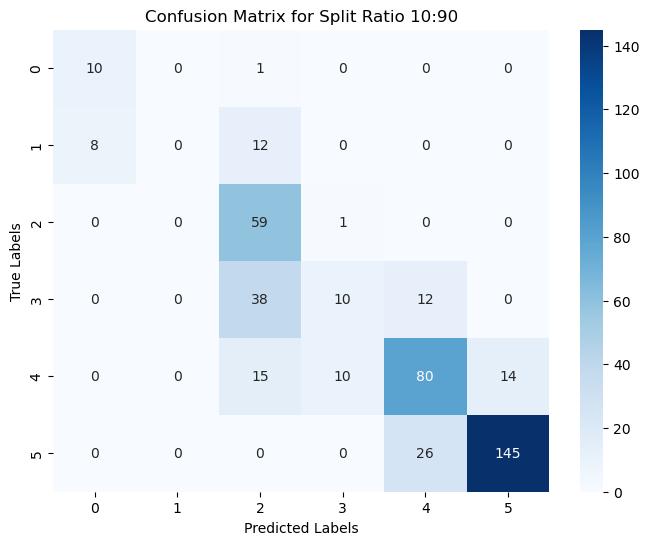

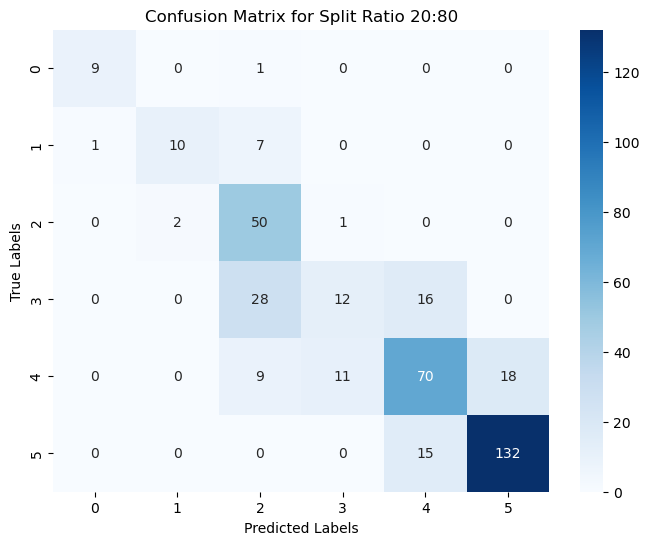

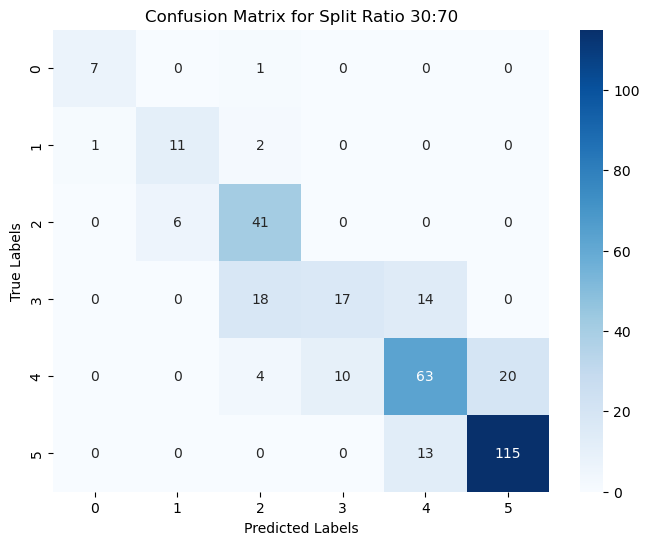

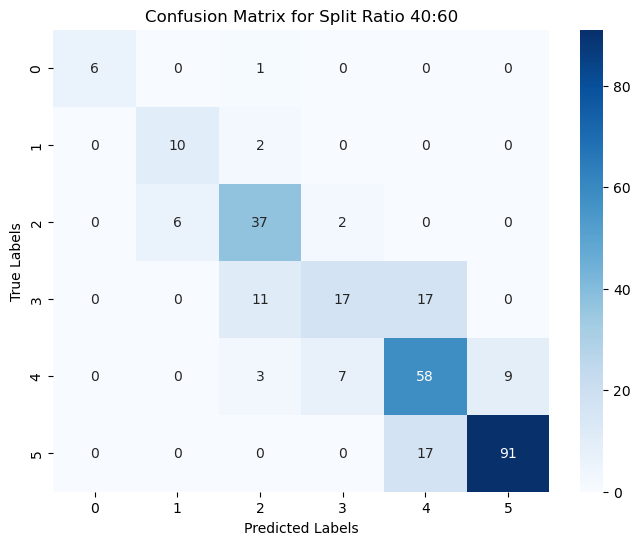

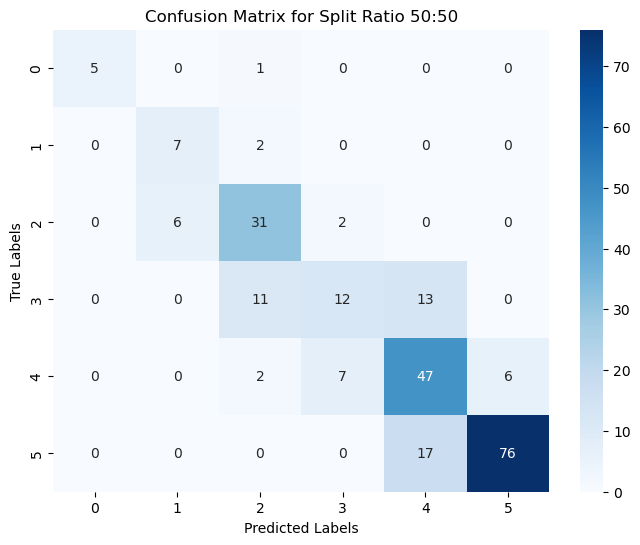

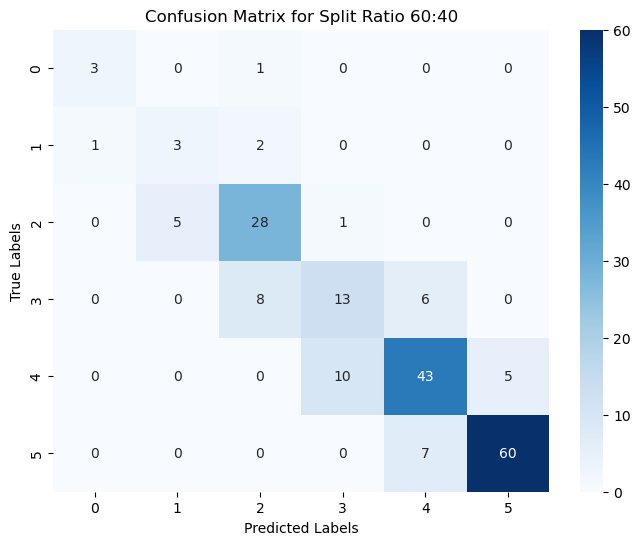

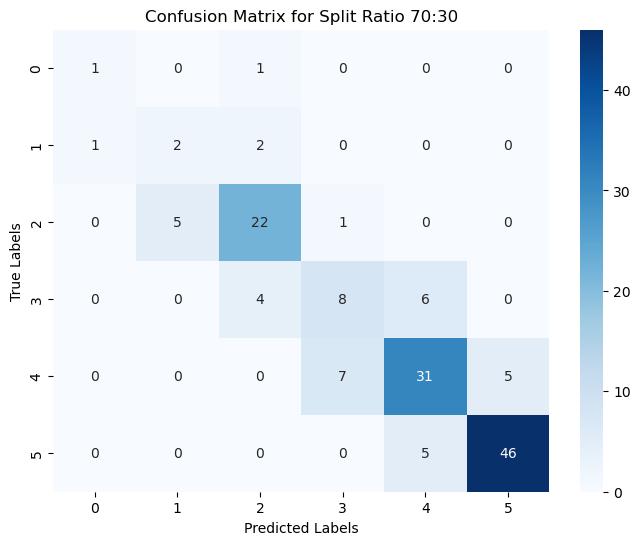

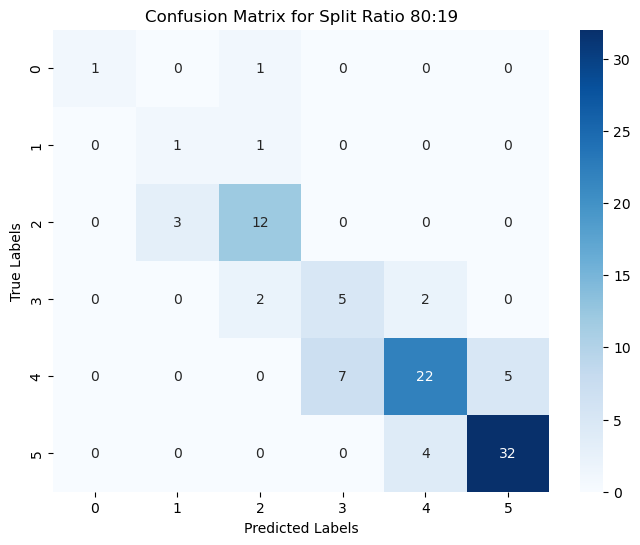

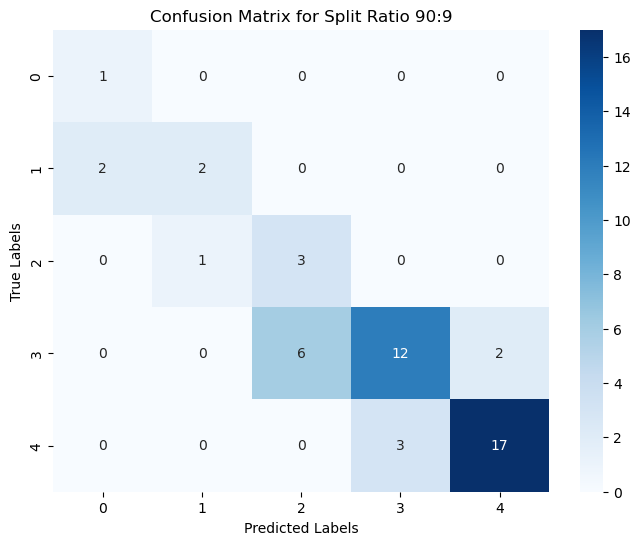

In [24]:
confusion_matrices = []  # Store the confusion matrices

for ratio in split_ratios:
    x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=ratio, test_size=1-ratio, random_state=42)
    LR_model = LogisticRegression()
    LR_model.fit(x_train, y_train)
    y_pred = LR_model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)  # Calculate the confusion matrix
    confusion_matrices.append(cm)  # Store the confusion matrix

# Iterate over the confusion matrices
for ratio, confusion_matrix in zip(split_ratios, confusion_matrices):
    # Create a heatmap for the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")

    # Add labels, title, and ticks
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix for Split Ratio {int(ratio*100)}:{int((1-ratio)*100)}")

    # Show the plot
    plt.show()
